In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Dataset.csv")
data = data.drop('Name', axis = 1)

x = data.drop('Emotion', axis = 1)
y = data['Emotion']

In [2]:
from sklearn.model_selection import train_test_split
#svm_train, svm_test = train_test_split(data, test_size=0.2)
dataTrain, dataTest, classTrain, classTest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [3]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np

svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(dataTrain)

Z_svm_train = scaler.transform(dataTrain)
Z_svm_test = scaler.transform(dataTest)

svc_li.fit(Z_svm_train, np.asarray(classTrain))

predTrain = svc_li.predict(Z_svm_train)
predTest = svc_li.predict(Z_svm_test)

print('Linear Kernel')
print(classification_report(classTest, svc_li.predict(Z_svm_test)))

Linear Kernel
              precision    recall  f1-score   support

       ANGRY       0.66      0.61      0.63        38
        CALM       0.59      0.67      0.62        36
     DISGUST       0.30      0.31      0.31        42
     FEARFUL       0.48      0.57      0.52        40
       HAPPY       0.44      0.35      0.39        40
     NEUTRAL       0.36      0.16      0.22        25
         SAD       0.33      0.50      0.39        26
   SURPRISED       0.53      0.49      0.51        41

    accuracy                           0.47       288
   macro avg       0.46      0.46      0.45       288
weighted avg       0.47      0.47      0.46       288



In [4]:
from sklearn.metrics import accuracy_score

print("Training Accuracy: ", accuracy_score(classTrain, predTrain))
print("Testing Accuracy: ", accuracy_score(classTest, predTest))

Training Accuracy:  0.7491319444444444
Testing Accuracy:  0.4652777777777778


Confusion Matrix for Training Set:


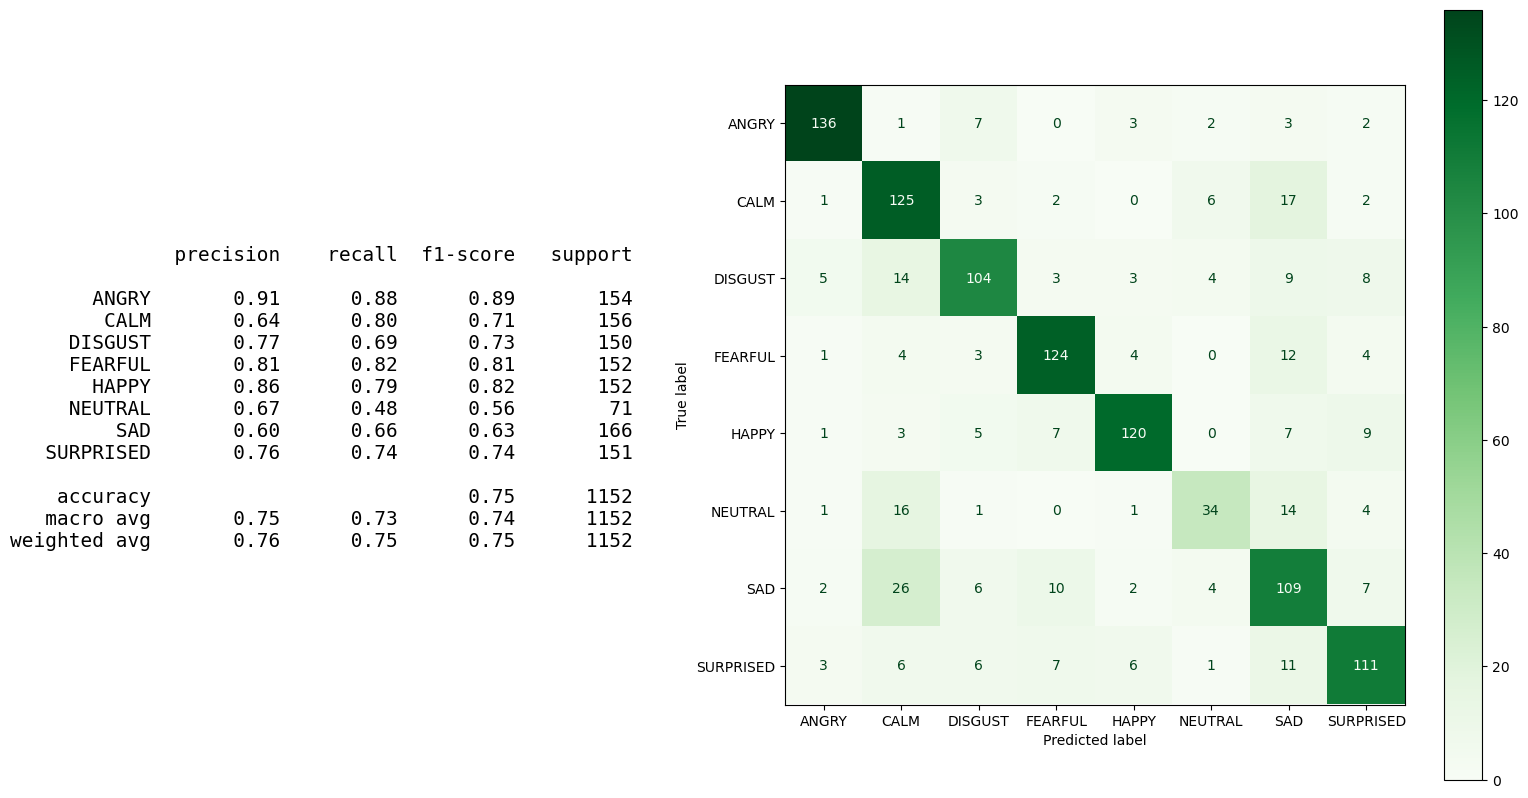

In [5]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix for Training Set:")

disp = ConfusionMatrixDisplay.from_predictions(classTrain, predTrain, display_labels = svc_li.classes_, cmap = plt.cm.Greens)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTrain, predTrain, zero_division = 0, target_names = svc_li.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

In [6]:
svc_rbf = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(dataTrain)

Z_train = scaler.transform(dataTrain)
Z_test = scaler.transform(dataTest)

svc_rbf.fit(Z_train, np.asarray(classTrain))

predTrain = svc_rbf.predict(Z_svm_train)
predTest = svc_rbf.predict(Z_svm_test)

print('RBF Kernel')
print(classification_report(classTest, svc_rbf.predict(Z_svm_test)))

RBF Kernel
              precision    recall  f1-score   support

       ANGRY       0.61      0.37      0.46        38
        CALM       0.47      0.78      0.58        36
     DISGUST       0.32      0.38      0.35        42
     FEARFUL       0.71      0.50      0.59        40
       HAPPY       0.40      0.30      0.34        40
     NEUTRAL       0.00      0.00      0.00        25
         SAD       0.28      0.46      0.35        26
   SURPRISED       0.41      0.54      0.46        41

    accuracy                           0.43       288
   macro avg       0.40      0.42      0.39       288
weighted avg       0.42      0.43      0.41       288



/Users/arya/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arya/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arya/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.metrics import accuracy_score

print("Training Accuracy: ", accuracy_score(classTrain, predTrain))
print("Testing Accuracy: ", accuracy_score(classTest, predTest))

Training Accuracy:  0.5677083333333334
Testing Accuracy:  0.4305555555555556


Confusion Matrix for Training Set:


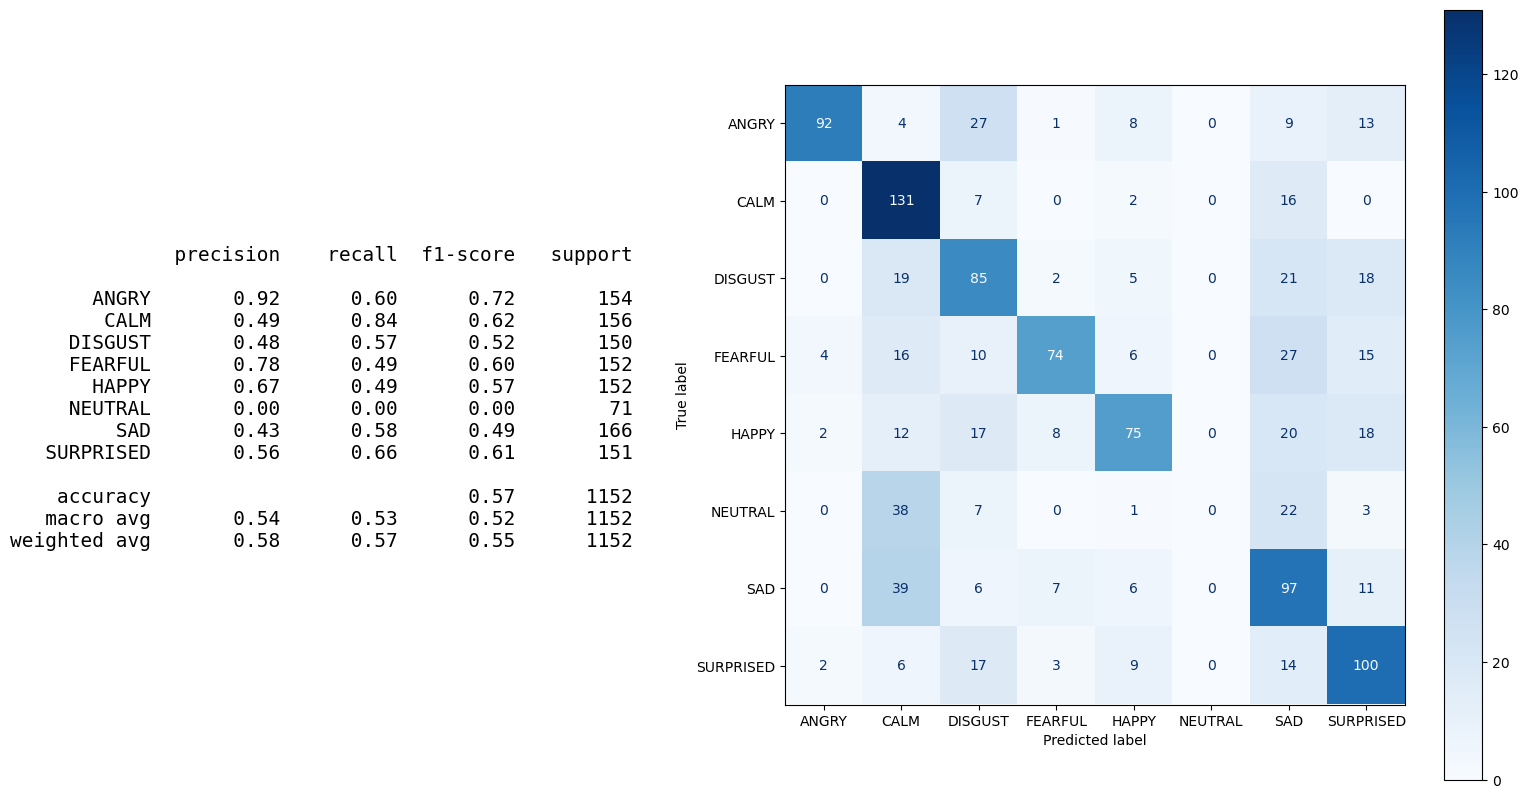

In [8]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix for Training Set:")

disp = ConfusionMatrixDisplay.from_predictions(classTrain, predTrain, display_labels = svc_rbf.classes_, cmap = plt.cm.Blues)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTrain, predTrain, zero_division = 0, target_names = svc_rbf.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()